In [1]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from config import *

sns.set(rc={'figure.figsize':(8,6)})

files = glob.glob(DATA_PATH + '/*')

'''
   Overview of the data we have:
       - [Good]       asset_statushistory   : time -- status(change) 
       - [Good]          asset_measurement  : time -- battery -- T -- signal
       - [Good]             asset_movement  : time -- location -- duration
       - [Can have]              asset_id   : type -- mac 
       - [Incomplete]               asset   : lack of asset_id
       - [Unclear]   asset_stationary-time  : average -- weight  (what is average?? does weight change?? unit of weight??)

'''



'\n   Overview of the data we have:\n       - [Good]       asset-statushistory   : time -- status(change) \n       - [Good]          asset_measurement  : time -- battery -- T -- signal\n       - [Good]             asset_movement  : time -- location -- duration\n       - [Can have]              asset_id   : type -- mac \n       - [Incomplete]               asset   : lack of asset_id\n       - [Unclear]   asset_stationary-time  : average -- weight  (what is average?? does weight change?? unit of weight??)\n\n'

# Asset status history

Text(0.5, 1.0, 'status-distribution of all')

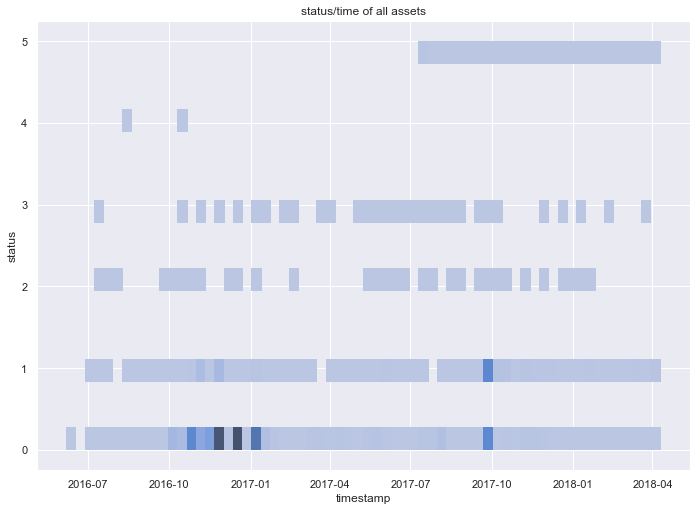

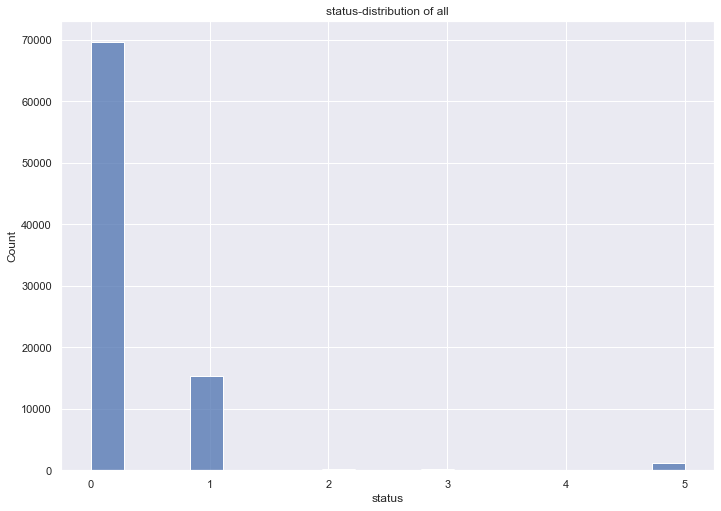

In [32]:
### asset-history: asset_id - status - time ######
# Many include only one status, a few changed 

d = pd.read_csv('./csvs/asset-statushistory.csv', delimiter=';')
d['timestamp'] = pd.to_datetime(d['timestamp'])

## status/timestamp overview of all assets
sns.histplot(d, x = 'timestamp', y = 'status')
plt.title('status/time of all assets')

plt.figure()
sns.histplot(d,  x = 'status')
plt.title('status-distribution of all')



5797 assets changed their status 


Text(0.5, 1.0, 'an example of asset 31079 that changed its status')

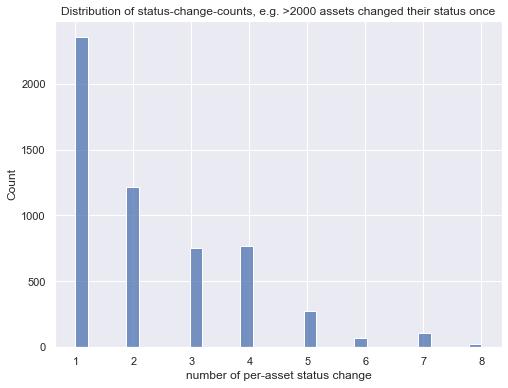

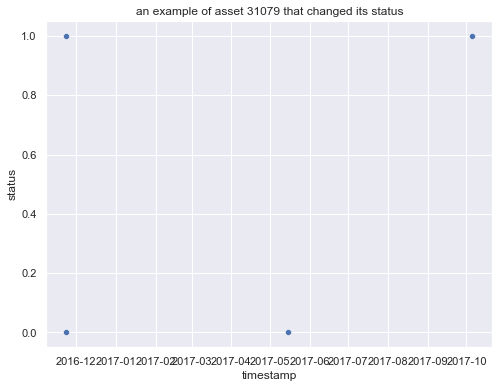

In [63]:
MAX_CHG = 10 # some asset changed status too many times, do not display
EXP_CHG = 4 # plot an example that changed status this times


## how many asset-id changed status
assetCnts = d['asset_id'].value_counts()

print('%d assets changed their status '%sum(assetCnts>1))
sns.histplot( assetCnts[(assetCnts>1) & (assetCnts<MAX_CHG)]-1)
plt.xlabel('number of per-asset status change')
plt.title("Distribution of status-change-counts, e.g. >2000 assets changed their status once")

## an example
plt.figure()
i = assetCnts.index[assetCnts==EXP_CHG][0]
asset1 = d[d['asset_id']==i]
sns.scatterplot(x=asset1['timestamp'], y=asset1['status'])
plt.title("an example of asset %d that changed its status"%i)

In [77]:
allAssets = np.unique(d['asset_id'])
print('number of assets: ', len(allAssets), ' max-id of asset: ', max(allAssets))

number of assets:  3597  max-id of asset:  6276


# asset measurement

number of assets:  3597  max-id of asset:  6276


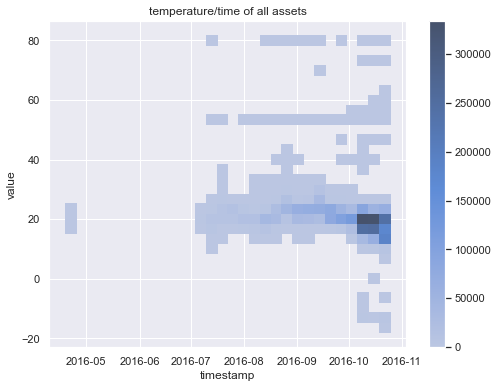

In [11]:
# dm = pd.read_csv('./csvs/asset_measurements.csv', delimiter=';')
# dm['timestamp'] = pd.to_datetime(dm['timestamp'])
# dm['value'] = [ float(v.replace(',', '.')) for v in dm['value']]
# dm['type'] = dm['type'].astype('string')

### asset_id matches with asset_historystatus
allmAssets = np.unique(dm['asset_id'])
print('number of assets: ', len(allmAssets), ' max-id of asset: ', max(allmAssets))

## temperature/timestamp overview of all assets
dmTemp = dm[dm['type']=='TEMPERATURE']
sns.histplot(dmTemp, x = 'timestamp', y = 'value', bins=30, cbar=True)
plt.title('temperature/time of all assets')

## To do: timestamp at only 11/2016, need load more data

# asset movement

In [39]:
# raw = pd.read_csv('./csvs/asset_movement.csv', delimiter=';')
# for type in ['from_lat', 'from_lon', 'to_lat', 'to_lon']:
#     raw[type] = [ float(v.replace(',', '.')) for v in raw[type]]
dv = raw[['asset_id', 'arrival_time']]
dv['arrival_time'] = pd.to_datetime(dv['arrival_time'])
dv['dist'] = ((raw['from_lat'] - raw['to_lat'])**2 + (raw['from_lon'] - raw['to_lon'])**2) ** .5


<ipython-input-39-df0d453b28fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dv['arrival_time'] = pd.to_datetime(dv['arrival_time'])
<ipython-input-39-df0d453b28fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dv['dist'] = ((raw['from_lat'] - raw['to_lat'])**2 + (raw['from_lon'] - raw['to_lon'])**2) ** .5


number of assets:  6194  max-id of asset:  68252


Text(0.5, 1.0, 'histogram of timestamp/distances')

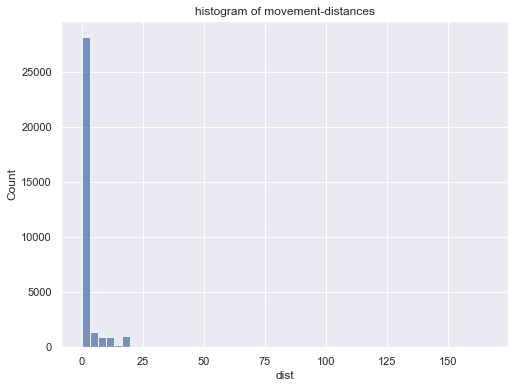

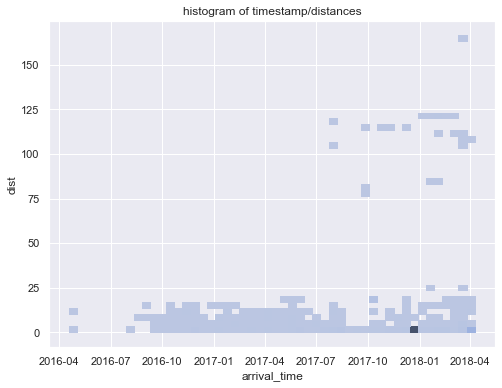

In [40]:
### many new asset_id found
allvAssets = np.unique(dv['asset_id'])
print('number of assets: ', len(allvAssets), ' max-id of asset: ', max(allvAssets))

## histogram of movement-distances
plt.figure()
sns.histplot(dv['dist'], bins=50)
plt.title('histogram of movement-distances')

## histogram of movement-timestamp
plt.figure()
sns.histplot(x=dv['arrival_time'], y=dv['dist'], bins=50)
plt.title('histogram of timestamp/distances')



Index(['id', 'asset_id', 'arrival_time', 'departure_time', 'last_seen_time',
       'to_lat', 'to_lon', 'to_site', 'from_lat', 'from_lon', 'from_site',
       'pool_id'],
      dtype='object')

In [5]:
1+2, 2+4

(3, 6)

In [6]:
34*54

1836